<a href="https://colab.research.google.com/github/valeromora/Procesamiento_Digital_de_Se-ales_2024_2/blob/main/exercise1_PSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from scipy.fft import fft, fftfreq, fftshift

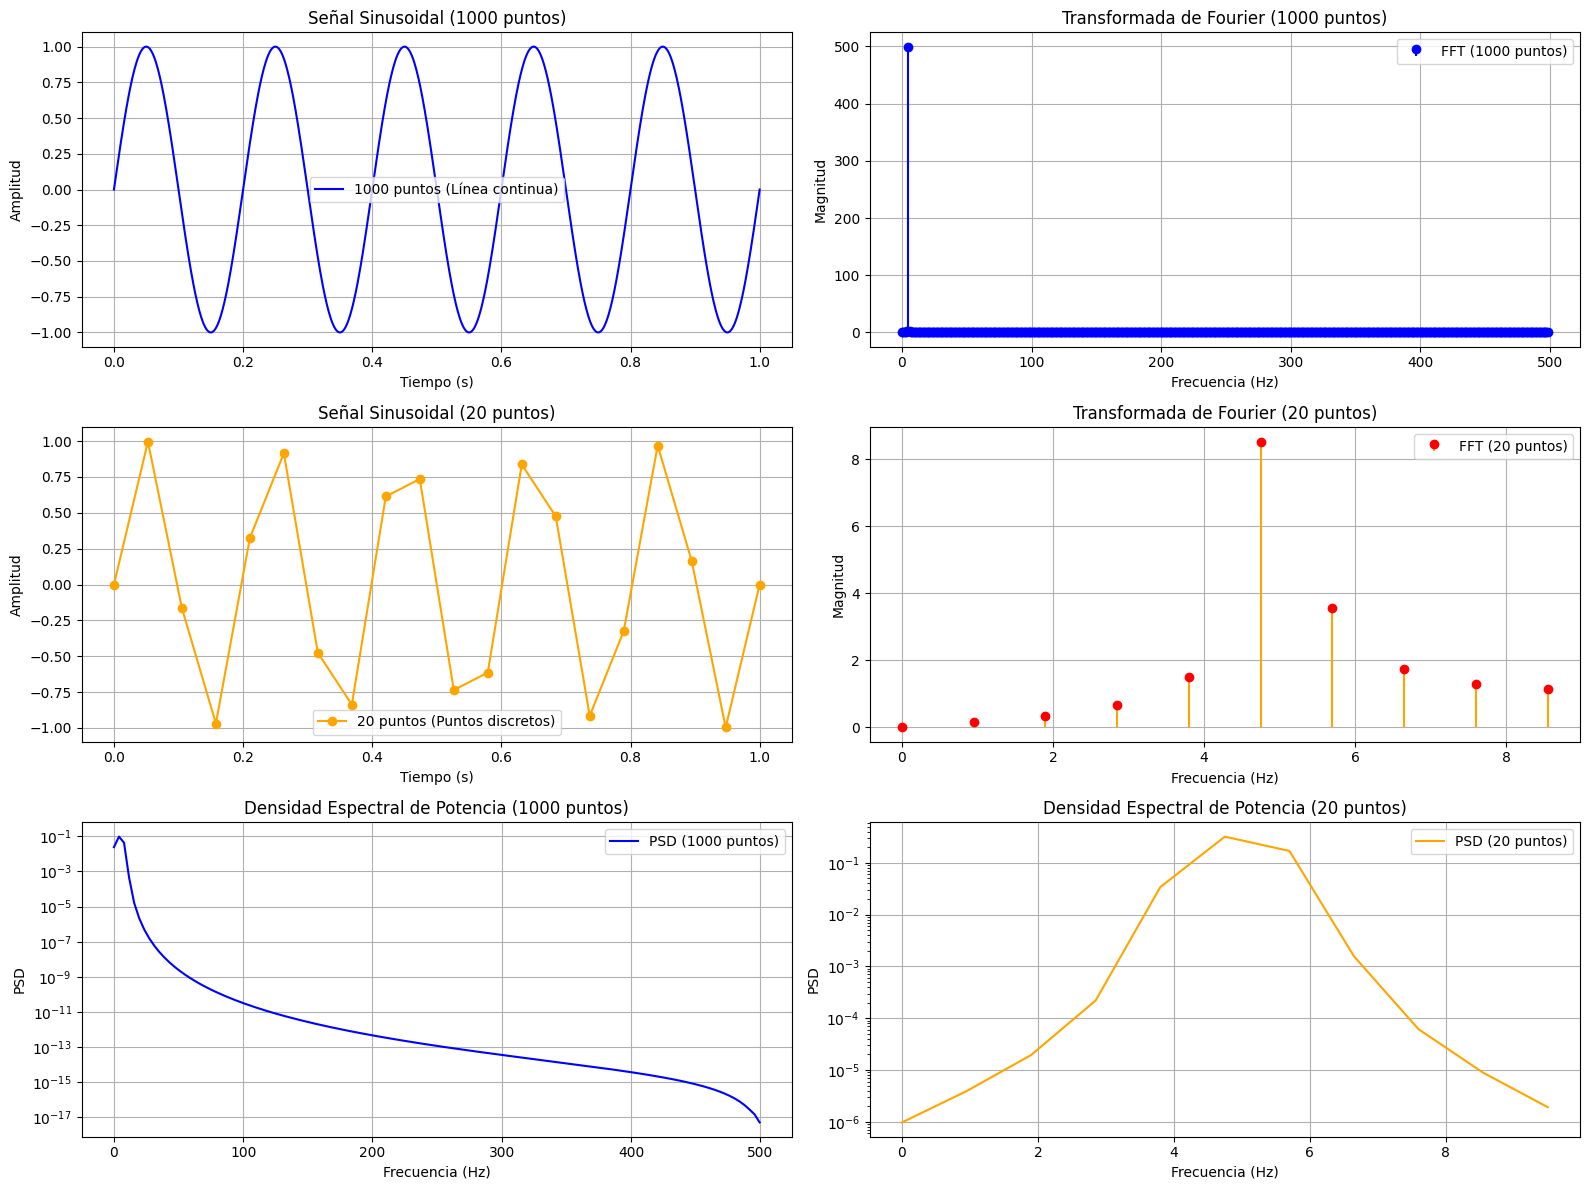

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import welch

# Parametros
f = 5  # Frecuencia
T = 1  # Duración
A = 1  # Amplitud

# Puntos de muestreo
t1 = np.linspace(0, T, 1000)
t2 = np.linspace(0, T, 20)

# Señales seno
sin1 = A * np.sin(2 * np.pi * f * t1)
sin2 = A * np.sin(2 * np.pi * f * t2)

# Transformada de Fourier
N1 = len(t1)
N2 = len(t2)
fft_sin1 = fft(sin1)
fft_sin2 = fft(sin2)

# Frecuencias asociadas
freq1 = fftfreq(N1, d=(t1[1] - t1[0]))[:N1 // 2]
freq2 = fftfreq(N2, d=(t2[1] - t2[0]))[:N2 // 2]

# Magnitudes
fft_sin1_mag = np.abs(fft_sin1)[:N1 // 2]
fft_sin2_mag = np.abs(fft_sin2)[:N2 // 2]

# PSD usando Welch
freq_psd1, psd1 = welch(sin1, fs=1/(t1[1] - t1[0]), nperseg=256)
freq_psd2, psd2 = welch(sin2, fs=1/(t2[1] - t2[0]), nperseg=256)

plt.figure(figsize=(16, 12))

# Señal 1000 puntos
plt.subplot(3, 2, 1)
plt.plot(t1, sin1, label='1000 puntos (Línea continua)', color='blue')
plt.title('Señal Sinusoidal (1000 puntos)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# FFT 1000 puntos
plt.subplot(3, 2, 2)
plt.stem(freq1, fft_sin1_mag, linefmt='blue', markerfmt='bo', basefmt=" ", label='FFT (1000 puntos)')
plt.title('Transformada de Fourier (1000 puntos)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid()
plt.legend()

# Señal 20 puntos
plt.subplot(3, 2, 3)
plt.plot(t2, sin2, 'o-', label='20 puntos (Puntos discretos)', color='orange')
plt.title('Señal Sinusoidal (20 puntos)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# FFT 20 puntos
plt.subplot(3, 2, 4)
plt.stem(freq2, fft_sin2_mag, linefmt='orange', markerfmt='ro', basefmt=" ", label='FFT (20 puntos)')
plt.title('Transformada de Fourier (20 puntos)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid()
plt.legend()

# PSD 1000 puntos
plt.subplot(3, 2, 5)
plt.semilogy(freq_psd1, psd1, label='PSD (1000 puntos)', color='blue')
plt.title('Densidad Espectral de Potencia (1000 puntos)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PSD')
plt.grid()
plt.legend()

# PSD 20 puntos
plt.subplot(3, 2, 6)
plt.semilogy(freq_psd2, psd2, label='PSD (20 puntos)', color='orange')
plt.title('Densidad Espectral de Potencia (20 puntos)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PSD')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()
